In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from datetime import datetime

# trun off some pandas warnings
pd.options.mode.chained_assignment = None  # default='warn'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# plot styles
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [130]:
df_1=pd.read_csv('page_2000.csv')

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5731) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [360]:
vins=df[['VIN']]
vins.to_csv('vins', index=False)

In [361]:
cars=[{'Country': 'Germany',
  'Doors': '3',
  'Engine': '6',
  'Make': 'TOYOTA',
  'Model': 'Supra',
  'ModelYear': '1994',
  'PlantCountry': 'Japan',
  'Trim': '',
  'VIN': 'JT2JA81L0R0022322'},
 {'Country': 'Germany',
  'Doors': '',
  'Engine': '4',
  'Make': 'MAZDA',
  'Model': 'Mazda6',
  'ModelYear': '2012',
  'PlantCountry': 'United States (USA)',
  'Trim': 'Sport/GS',
  'VIN': '1YVHZ8BHXC5M06895'},
 {'Country': 'Germany',
  'Doors': '2',
  'Engine': '12',
  'Make': 'ASTON MARTIN',
  'Model': 'DB11',
  'ModelYear': '2017',
  'PlantCountry': 'United Kingdom (UK)',
  'Trim': '',
  'VIN': 'SCFRMFAV9HGL00097'}]

In [396]:
result=pd.concat([ca, rs], axis=1, ignore_index=False)
result

,Country,Doors,Make,Model,ModelYear,PlantCountry,Trim,VIN,Drivetrain,Engine,Exterior Color,Fuel Type,Interior Color,Mileage,Transmission,VIN,price,text_blobs
0,Germany,3,TOYOTA,Supra,1994,Japan,,JT2JA81L0R0022322,NaN,3.0L I6 24V SPFI DOHC,Renaissance Red,Gasoline,Black,"89,843",4-Speed Automatic,JT2JA81L0R0022322,"$28,800",4-wheel ABS Brakes\nCloth seat upholstery\nCru...
1,Germany,,MAZDA,Mazda6,2012,United States (USA),Sport/GS,1YVHZ8BHXC5M06895,FWD,2.5L I4 16V MPFI DOHC,Polished Slate,Gasoline,Black,"102,685",5-Speed Automatic,1YVHZ8BHXC5M06895,"$5,999",1st and 2nd row curtain head airbags\n4-wheel ...
2,Germany,2,ASTON MARTIN,DB11,2017,United Kingdom (UK),,SCFRMFAV9HGL00097,RWD,5.2L V12 48V GDI DOHC Twin Turbo,Red,Gasoline,Black,"13,793",8-Speed Automatic,SCFRMFAV9HGL00097,"$176,500",1st and 2nd row curtain head airbags\n4-wheel ...


# Second page manipulation

In [135]:
def changing(df):
    for column in df.columns[11:]:
        temp = []
        try:
            for i in df[column].values:
                if i==1.0:
                    temp.append(str(column))
                else:
                    temp.append(str(i))
            df[column]=temp
            print("Finished with: {}".format(column))
        except:
            print("I couldn't figure out: {}".format(column))
#     return df    

In [153]:
changing(df_2)

In [137]:
def make_text_col(df):
    text_blobs = []
    for i in range(df.shape[0]):
        temp = [str(i) for i in list(df.iloc[i, 11:].values) if str(i) != 'nan']
        text_blobs.append("\n".join(temp))
        print('finished with row: {}'.format(i))
    df['text_blobs'] = text_blobs

In [154]:
make_text_col(df_2)

# First page

In [155]:
changing(df_1)

In [156]:
make_text_col(df_1)

# Page 3

In [157]:
changing(df_3)

In [158]:
make_text_col(df_3)

In [159]:
df_2=pd.read_csv('page_second1600.csv')
df_3=pd.read_csv('page_third657.csv')
df_page_2=pd.read_csv('page_2.csv')

In [161]:
changing(df_page_2)

In [162]:
make_text_col(df_page_2)

In [426]:
df=pd.concat([df_page_1_drop, df_page_2_drop,df_1_drop,df_2_drop,df_3_drop], axis=0, ignore_index=True)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [428]:
df.drop(['Vehicle History Report','Stock'], axis=1, inplace=True)

In [179]:
df.to_csv('total_cars', index=False)

In [565]:
s=df['Drivetrain']

In [429]:
s=s.map(lambda x:'RWD' if x==' Rear Wheel Drive' else x) 
s=s.map(lambda x:'AWD' if x==' All Wheel Drive' else x)
s=s.map(lambda x:'4WD' if x==' Four Wheel Drive' else x)
s=s.map(lambda x:'FWD' if x==' Front Wheel Drive' else x)
s=s.map(lambda x:'FWD' if x==' 4MATIC' else x)
s=s.map(lambda x:'FWD' if x==' Front Wheel Drive' else x)
s=s.map(lambda x:'FWD' if x==' 2WD' else x)
s=s.map(lambda x:'4WD' if x==' 4X4' else x)
s=s.map(lambda x:'FWD' if x==' FWD' else x)
s=s.map(lambda x:'AWD' if x==' AWD' else x)
s=s.map(lambda x:'RWD' if x==' RWD' else x)
s=s.map(lambda x:'4WD' if x==' 4WD' else x)
df['Drivetrain']=s

In [599]:
for i in range(df.shape[0]):
    if type(df.VIN[i])!=float:
        df.VIN[i].lstrip()
    elif type(df.VIN[i])==float:
        print(i)
    else:
        print(i)

2773
3847
4147


In [595]:
df.VIN[2773]

nan

In [600]:
df.drop([2773,3847,4147], inplace=True)

In [601]:
df.VIN=df.VIN.map(lambda x:x.lstrip())

In [605]:
df.shape

(4462, 10)

In [617]:
df.VIN[3400]==df_model.VIN[3400]

False

In [434]:
df_model.drop(["Country","Engine","Trim","Doors"], axis=1, inplace=True)

In [623]:
df_model.shape

(4462, 5)

In [163]:
df.drop_duplicates()

In [627]:
df.shape

(4462, 10)

In [1188]:
result=pd.merge(df, df_model, on="VIN")

In [1191]:
result.drop_duplicates(inplace=True)

In [1192]:
result.shape

(4248, 14)

In [1193]:
result.to_csv('result', index=False)

In [1699]:
new_df=result.reset_index()

In [1700]:
new_df=new_df.drop('VIN', axis=1)

# Dealing with missing values

In [1632]:
new_df=new_df.replace('', np.nan, regex=True)

In [1705]:
new_df.Drivetrain=new_df.Drivetrain.map(lambda x: str(x))

new_df.Drivetrain=new_df.Drivetrain.map(lambda x: 'RWD' if x=='nan' else x)

new_df.Engine=new_df.Engine.map(lambda x: str(x))

In [1710]:
# P11 model has no engine value in this dataset, so filled it from Wikipedia info.
new_df.Engine=new_df.Engine.map(lambda x: '3.0L V6 24V DDI DOHC Turbo Diesel' if x =='nan' else x)

In [1715]:
new_df.Trans= re.sub("[^a-zA-Z0-9]"," ", new_df.Transmission[0])

new_df.price=new_df.price.map(lambda x: x.replace('$', '').lower())

new_df['Trans']=new_df['Transmission'].apply(lambda x: str(x).lower())

new_df['Trans']=new_df['Trans'].replace(regex=True,to_replace=r'-',value=r'')

In [1716]:
def parse_transmission(x):
    temp = ''
    for i in ['automatic', 'manual']:
        if i in x:
            temp+=i
#     for j in range(1,10):
#         if str(j) in x:
#             temp+=" " +str(j)
    return temp

In [1717]:
new_df['Trans'] = new_df['Trans'].map(parse_transmission)

In [1718]:
new_df['Trans'] = new_df['Trans'].map(lambda x: 'automatic' if x!='manual' else x )

In [1719]:
new_df['Transmission']=new_df['Trans']

new_df=new_df.drop('Trans', axis=1)

In [1732]:
new_df.Model=new_df.Model.map(lambda x: str(x))

new_df.Make=new_df.Make.map(lambda x: str(x))

new_df.ModelYear=new_df.ModelYear.map(lambda x: str(x))

In [1733]:
text_df=new_df

In [1735]:
tesxt_df=text_df.drop(text_df.Model[text_df.Model=='nan'].index)

tesxt_df=text_df.drop(text_df.Make[text_df.Make=='nan'].index)

tesxt_df=text_df.drop(text_df.ModelYear[text_df.ModelYear=='nan'].index)

In [1712]:
# dt = list(set(zip(d['Drivetrain'].values, d['Model'].values)))

# len(dt)

# dt_dict = {}
# for train, model in dt:
#     dt_dict[model] = train

# dt_dict['M5']

# # dt_dict.values()

# null_count = 0
# for i in list(dt_dict.values()):
#     try:
#         if np.isnan(i)==True:
#             null_count +=1
#     except:
#         pass
# print(null_count)

# def fill_dt(df):
#     try:
#         return dt_dict[df['Model']]
#     except:
#         return "unknown"



# d['train_filled'] = d['Model'].map(lambda x: dt_dict[x])

In [1633]:
new_df.Trans= re.sub("[^a-zA-Z0-9]"," ", new_df.Transmission[0])

new_df.price=new_df.price.map(lambda x: x.replace('$', '').lower())

new_df['Trans']=new_df['Transmission'].apply(lambda x: str(x).lower())

new_df['Trans']=new_df['Trans'].replace(regex=True,to_replace=r'-',value=r'')

In [1659]:
new_df['Trans'] = new_df.apply(lambda row: re.sub( '(?<=automatic)(.*)|(?<=manual)(.*)','', row['Trans']), axis=1)

new_df['Trans'] = new_df.apply(lambda row: re.sub( '(.*)(?=automatic)|(.*)(?=manual)','', row['Trans']), axis=1)

new_df['Trans'] = new_df.apply(lambda row: re.sub( ' a','automatic', row['Trans']), axis=1)

new_df['Trans'] = new_df.apply(lambda row: re.sub( 'm','manualanual', row['Trans']), axis=1)

new_df['Trans'] = new_df.apply(lambda row: re.sub( '8speedautomanualatic/t ','automa', row['Trans']), axis=1)

In [1673]:
# def parse_transmission(x):
#     temp = ''
#     for i in ['automatic', 'manual']:
#         if i in x:
#             temp+=i
# #     for j in range(1,10):
# #         if str(j) in x:
# #             temp+=" " +str(j)
#     return temp

In [1674]:
# new_df['Trans'] = new_df['Trans'].map(parse_transmission)

In [1750]:
text_df.to_csv('clean_data_for_nlp', index=False)

#  NLP part


In [1744]:
text_df[['text_blobs']].head()

,text_blobs
0,4-wheel ABS Brakes\nCloth seat upholstery\nCru...
1,1st and 2nd row curtain head airbags\n4-wheel ...
2,1st and 2nd row curtain head airbags\n4-wheel ...
3,1st and 2nd row curtain head airbags\n4-wheel ...
4,Traction Control\nDual Climate Control\nKeyles...


In [2]:
# text_df

In [121]:
categ=pd.read_csv('categorical.csv')

In [114]:
categ.shape

(4247, 9)

In [122]:
pop_model=[k for k,v in dict(categ.Make.value_counts()).items() if v>=30]

In [126]:
for i in pop_model:
    categ['make_is_'+i] = categ['Make']==i

In [129]:
categ.to_csv('categ',index=False)

In [46]:
# def dummyEncode(df):
#         columnsToEncode = list(df.select_dtypes(include=['category','object']))
#         le = LabelEncoder()
#         for feature in columnsToEncode:
#             try:
#                 df[feature] = le.fit_transform(df[feature])
#             except:
#                 print('Error encoding '+feature)
#         return df

In [150]:
# dummyEncode(categ)

# EDA

In [133]:
clean_data=pd.read_csv('clean_data_for_nlp')
clean_data=clean_data.dropna()

In [135]:
print( 'Number of unique years is %s' % len(clean_data.ModelYear.unique()))
print( 'Number of unique makes is %s' % len(clean_data.Make.unique()))
print ('Number of unique models is %s' % len(clean_data.Model.unique()))

Number of unique years is 34
Number of unique makes is 54
Number of unique models is 485


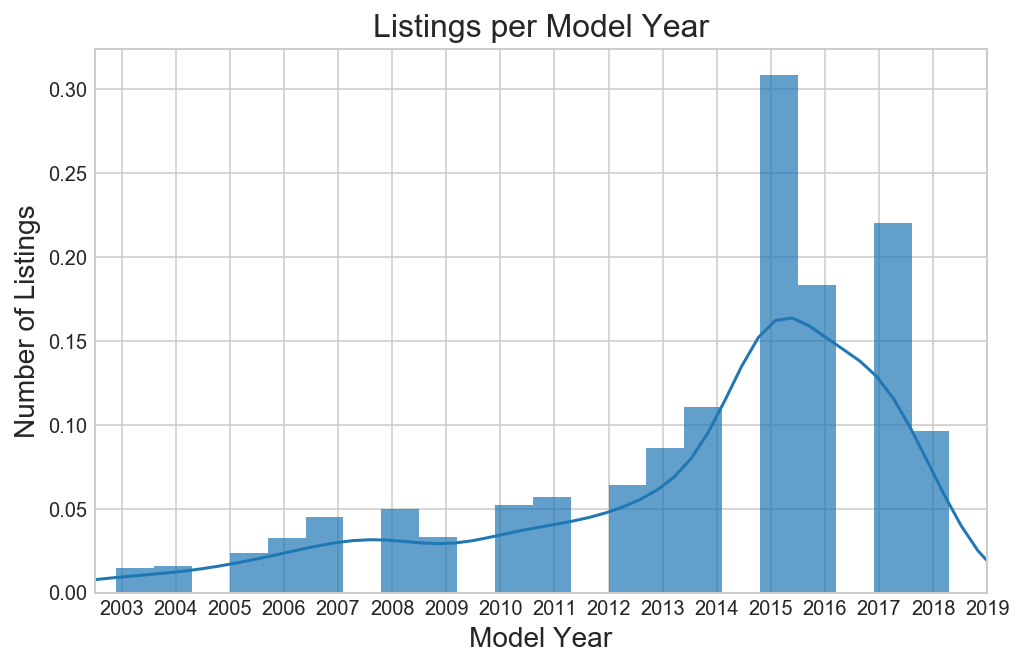

In [148]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.distplot(clean_data.ModelYear,kde=True, hist_kws={"alpha":0.7,'width':0.7})
plt.title('Listings per Model Year',fontsize=16)
plt.xticks(sorted(clean_data.ModelYear.unique()))
plt.ylabel('Number of Listings',fontsize=14)
plt.xlabel('Model Year', fontsize=14)
plt.xlim(2002.5,2019)
plt.show()

In [164]:
large=pd.read_csv("num_lbl_enc")

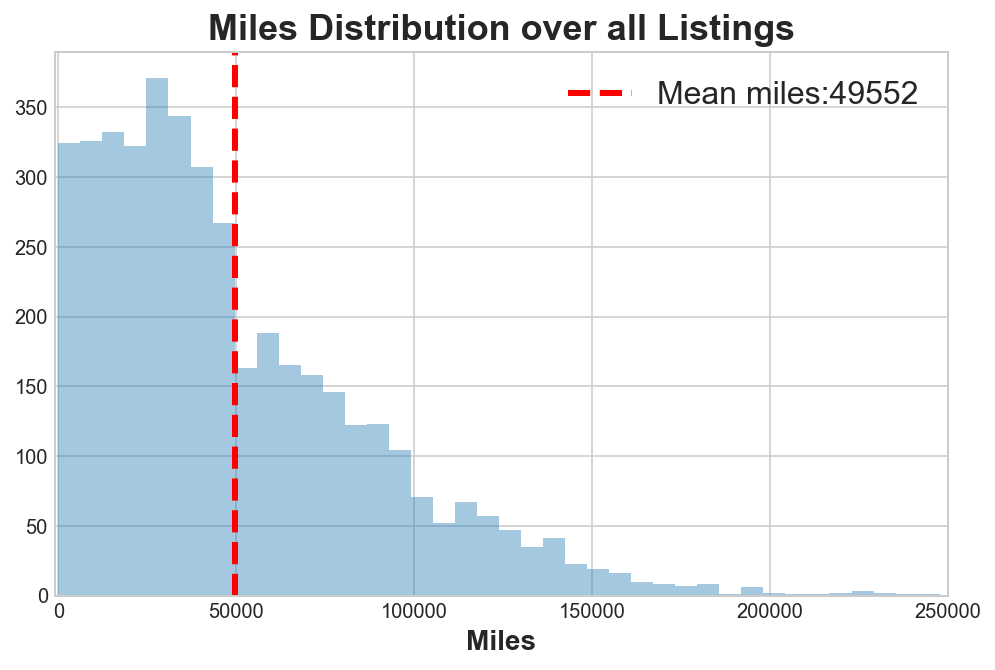

In [190]:
# look at miles overall distribution# look a 
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.distplot(large.Mileage,kde=False)
plt.xlabel('Miles',fontsize=14,fontweight="bold")
plt.axvline(large.Mileage.mean(),lw=3,ls='dashed',
            color='red',label='Mean miles:'+'{0:.0f}'.format(np.mean(large.Mileage)))
plt.title('Miles Distribution over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,250000)
plt.show()

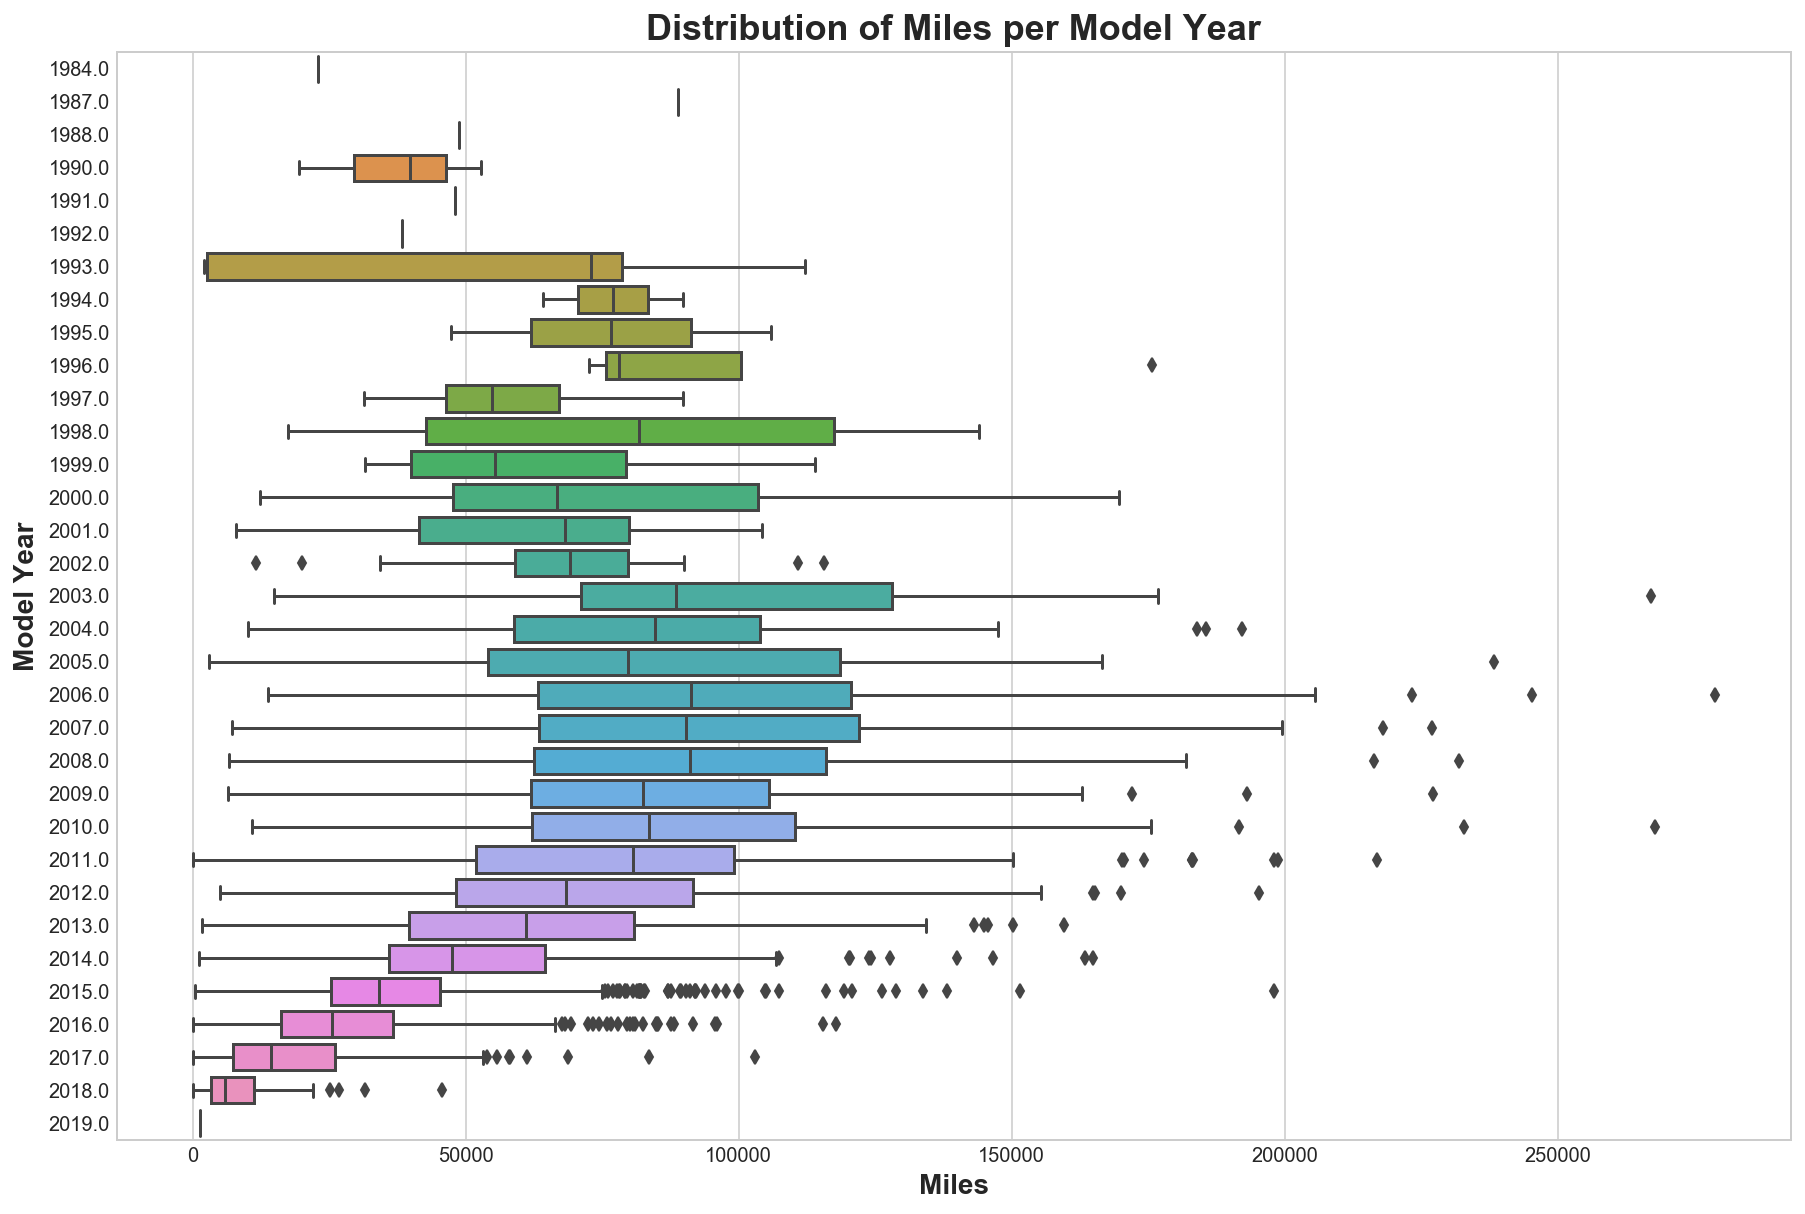

In [184]:
# look at miles by year boxplot# look a 
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
sns.boxplot(x='Mileage',y='ModelYear',data=large,notch=False,orient='h')
plt.xlabel('Miles',fontsize=14,fontweight="bold")
ax.set_yticklabels(sorted(large.ModelYear.unique()))
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Distribution of Miles per Model Year',fontsize=18,fontweight="bold")
# plt.xlim(-5000,300000)
plt.show()

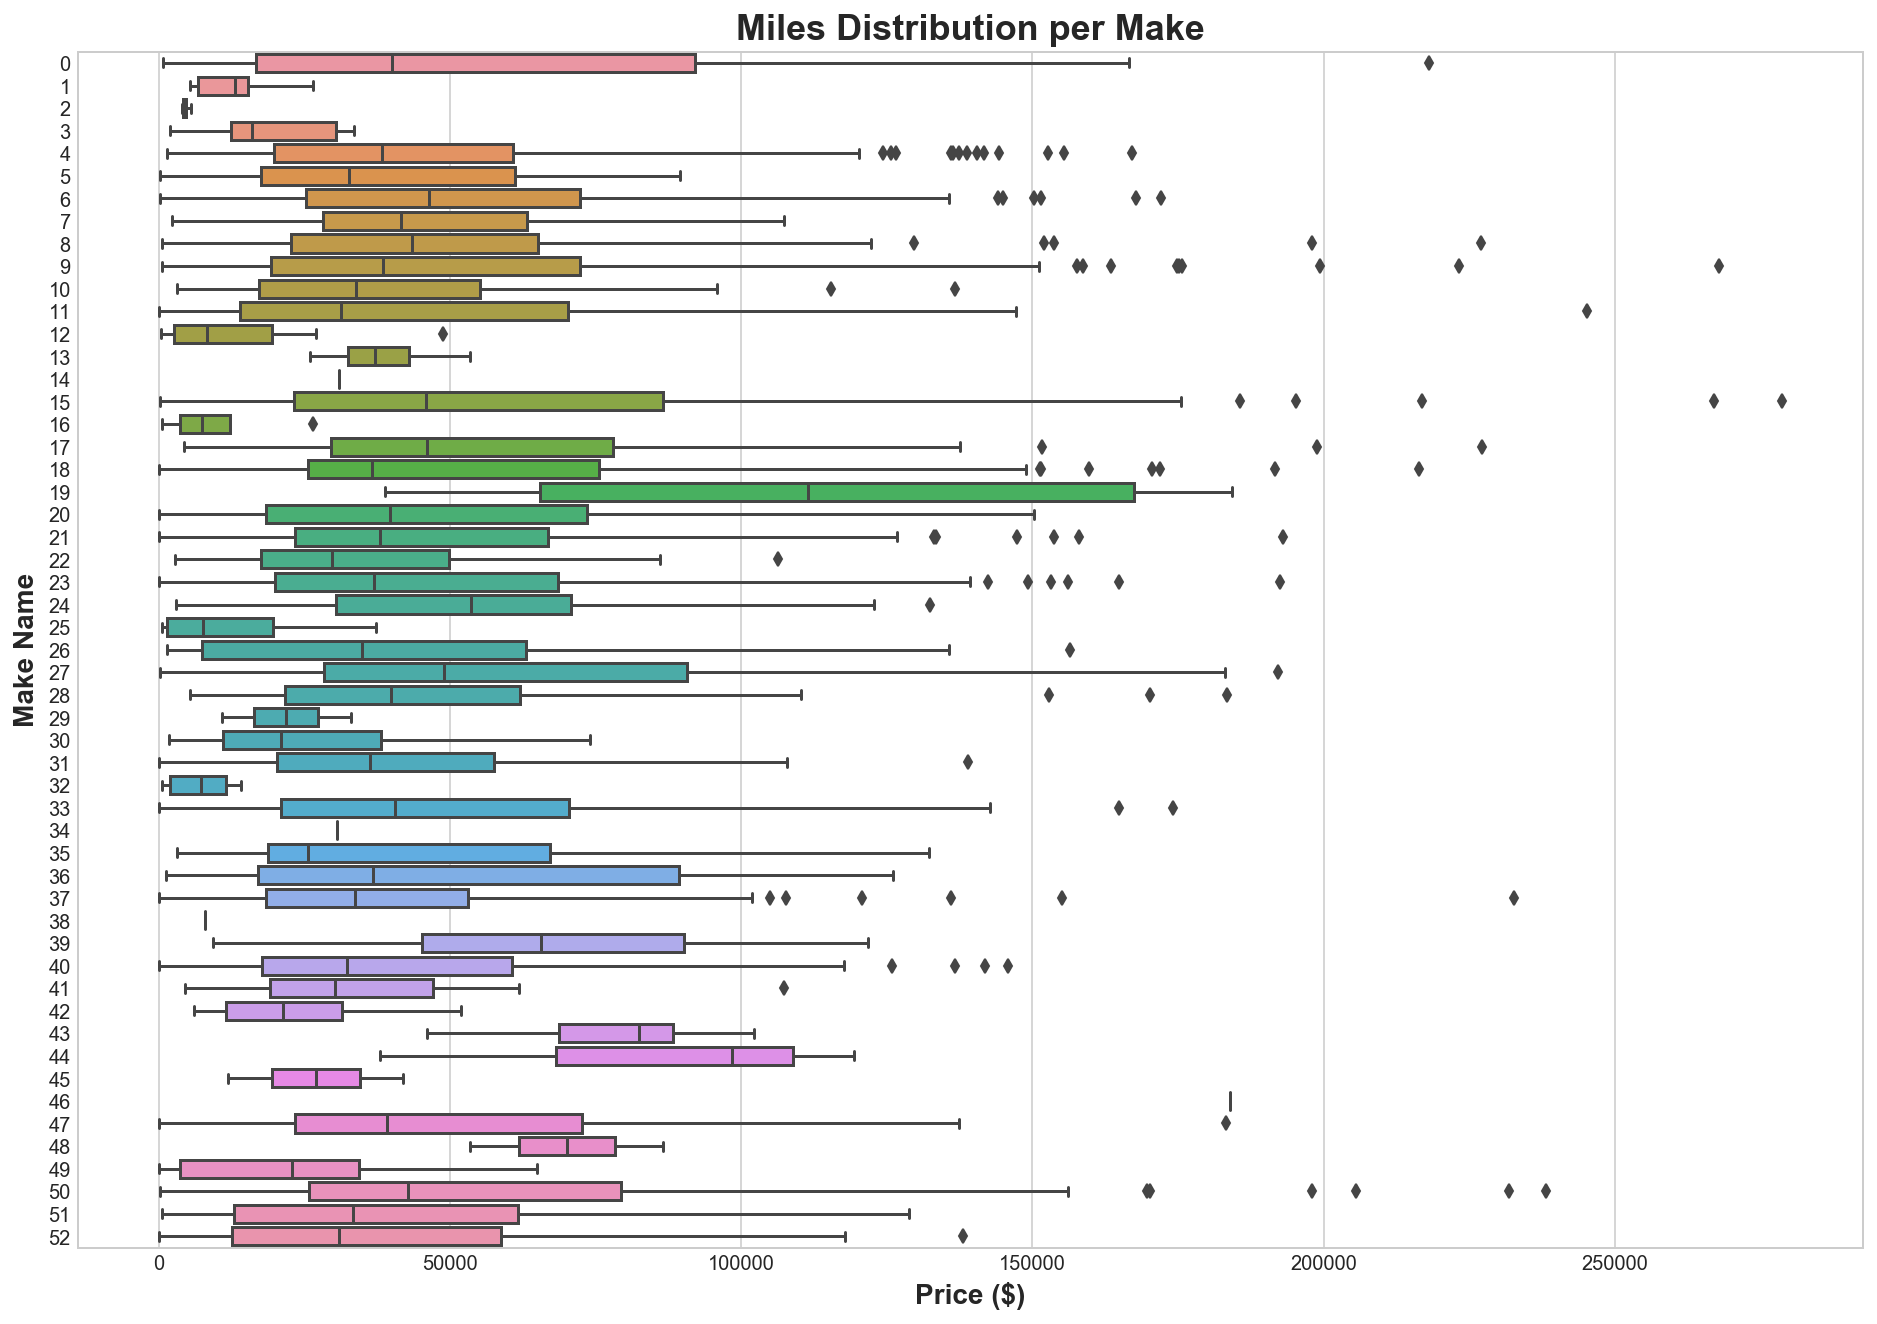

In [187]:
# look at miles by make boxplot
# limit upper prices so it's more informative

fig = plt.figure(figsize=(16,11))
ax = fig.gca()
sns.boxplot(x='Mileage',y='Make',data=large,
            order=sorted(large.Make.unique()),notch=False,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Make Name',fontsize=14,fontweight="bold")
plt.title('Miles Distribution per Make',fontsize=18,fontweight="bold")
plt.show()

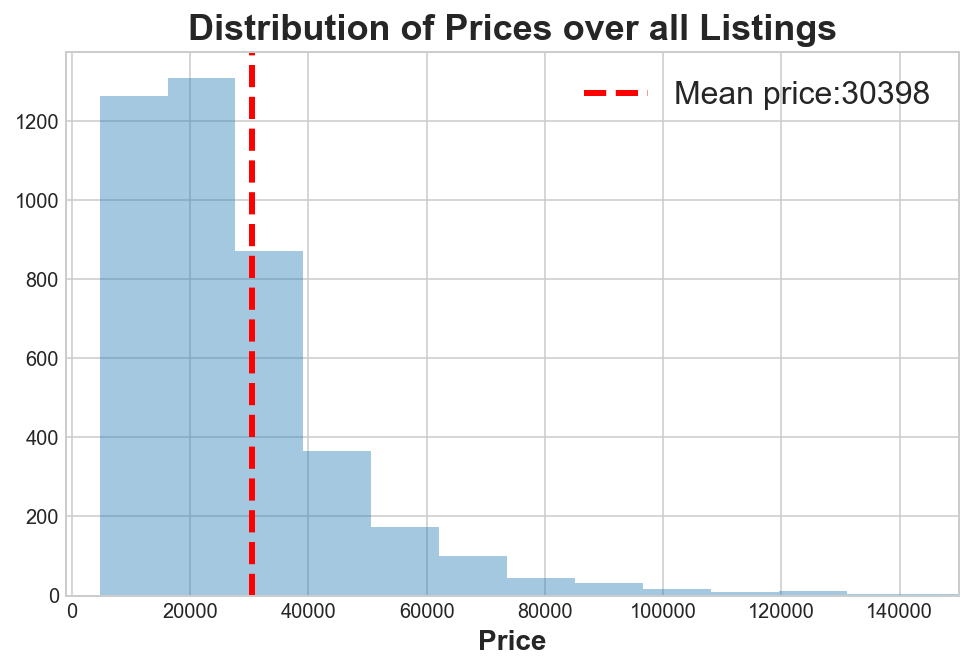

In [189]:
# look at price distribution# look a 
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.distplot(large.price,kde=False,bins=300)
plt.xlabel('Price',fontsize=14,fontweight="bold")
plt.axvline(large.price.mean(),lw=3,ls='dashed',
            color='red',label='Mean price:'+'{0:.0f}'.format(np.mean(large.price)))
plt.title('Distribution of Prices over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,150000)
plt.show()

In [3]:
large=pd.read_csv('num_txt_lbl')
large.head()

,index,Drivetrain,Exterior Color,Fuel Type,Interior Color,Mileage,Transmission,price,Make,Model,...,shift knob,stability control,steering wheel,steering wheel trim,temperature display,tire pressure,traction control,trip computer,vanity mirror,wheel trim
0,0,RWD,Renaissance Red,Gasoline,Black,89843,automatic,28800,TOYOTA,Supra,...,0.000000,0.000000,0.212907,0.130247,0.000000,0.000000,0.000000,0.000000,0.000000,0.130247
1,4,FWD,Polished Slate,Gasoline,Black,102685,automatic,5999,MAZDA,Mazda6,...,0.077833,0.118474,0.385839,0.067440,0.149421,0.147259,0.113403,0.000000,0.207827,0.067440
2,5,RWD,Red,Gasoline,Black,13793,automatic,176500,ASTON MARTIN,DB11,...,0.000000,0.092316,0.257698,0.052549,0.116429,0.057372,0.088364,0.055669,0.161940,0.052549
3,6,RWD,Blue,Gasoline,Black,41050,automatic,34695,BMW,M5,...,0.084576,0.064370,0.239582,0.073283,0.081183,0.080009,0.123229,0.077633,0.075278,0.073283
4,7,RWD,Bianco Avus,Gasoline,Nero,2592,automatic,429800,FERRARI,458 Speciale,...,0.000000,0.197436,0.183713,0.112387,0.000000,0.000000,0.188985,0.000000,0.000000,0.112387


In [229]:
#ordered_makes = sorted(cc_data.makeName.unique())
temp = large[(large.price<150000) & (large.Make == 'TOYOTA') | (large.Make == 'CHEVROLET')]

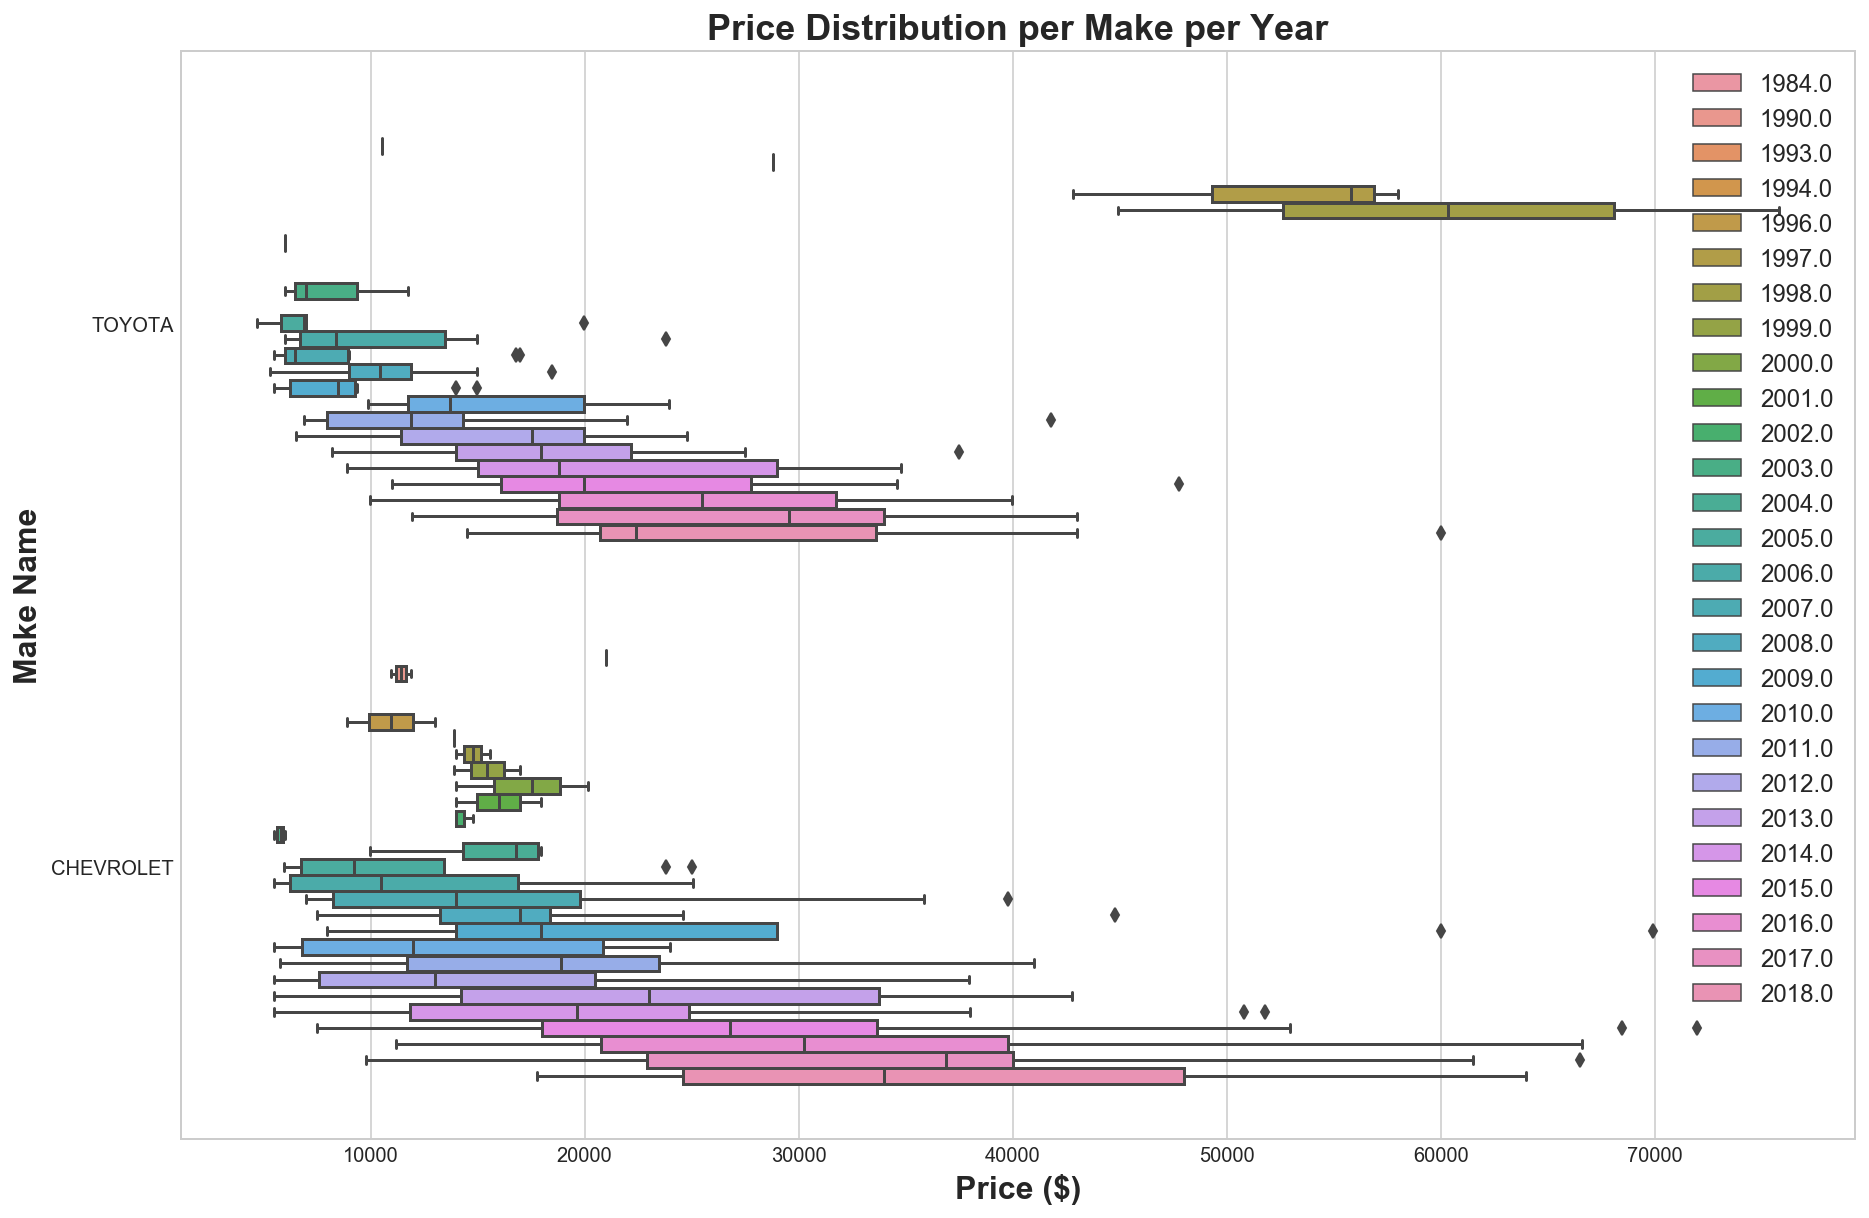

In [233]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
sns.boxplot(x='price',y='Make',data=temp, order=['TOYOTA','CHEVROLET'],
            hue=(temp.ModelYear), notch=False ,orient='h')
plt.xlabel('Price ($)',fontsize=16,fontweight="bold")
plt.ylabel('Make Name',fontsize=16,fontweight="bold")
plt.title('Price Distribution per Make per Year',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=12)
plt.show()

In [8]:
#ordered_makes = sorted(cc_data.makeName.unique())
temp = large[(large.Model == 'Corolla')]

In [9]:
temp

,index,Drivetrain,Exterior Color,Fuel Type,Interior Color,Mileage,Transmission,price,Make,Model,...,shift knob,stability control,steering wheel,steering wheel trim,temperature display,tire pressure,traction control,trip computer,vanity mirror,wheel trim
137,176,FWD,Black,Gasoline,Black,30302,automatic,13962,TOYOTA,Corolla,...,0.000000,0.244617,0.000000,0.000000,0.308512,0.000000,0.234146,0.000000,0.000000,0.000000
385,445,FWD,White,Gasoline,Black,28220,manual,13499,TOYOTA,Corolla,...,0.089000,0.067737,0.252114,0.077116,0.085430,0.168387,0.129675,0.081694,0.079215,0.077116
997,1057,FWD,Gray,Gasoline,Ash,54937,manual,9521,TOYOTA,Corolla,...,0.101737,0.154860,0.288194,0.088152,0.195311,0.192485,0.148232,0.093385,0.271655,0.088152
1060,1123,FWD,Slate Metallic,Gasoline,Black,39386,automatic,12986,TOYOTA,Corolla,...,0.063613,0.048415,0.225248,0.000000,0.061061,0.120355,0.092685,0.058391,0.169858,0.000000
1102,1165,FWD,Indigo Ink Pearl,Gasoline,Black,87222,automatic,5995,TOYOTA,Corolla,...,0.000000,0.000000,0.120719,0.000000,0.163624,0.000000,0.000000,0.000000,0.151722,0.000000
1111,1174,FWD,Slate Metallic,Gasoline,Black,45817,automatic,12680,TOYOTA,Corolla,...,0.000000,0.211473,0.000000,0.000000,0.266711,0.000000,0.202421,0.000000,0.000000,0.000000
1520,1613,FWD,Blue,Gasoline,Beige,99334,automatic,5477,TOYOTA,Corolla,...,0.000000,0.000000,0.204541,0.000000,0.277238,0.000000,0.000000,0.000000,0.000000,0.000000
1690,1810,FWD,Classic Silver Metallic,Gasoline,Black,42018,automatic,13800,TOYOTA,Corolla,...,0.085824,0.130639,0.425455,0.000000,0.164762,0.162378,0.125047,0.078778,0.229165,0.000000
1824,1971,FWD,Black Sand Mica,Gasoline,Black,14190,manual,15000,TOYOTA,Corolla,...,0.067190,0.051137,0.333081,0.058218,0.064495,0.127123,0.097897,0.061674,0.119606,0.058218
2073,2250,FWD,Classic Silver Metallic,Gasoline,Black,27491,automatic,12995,TOYOTA,Corolla,...,0.000000,0.434790,0.202285,0.000000,0.000000,0.270213,0.416180,0.262189,0.000000,0.000000


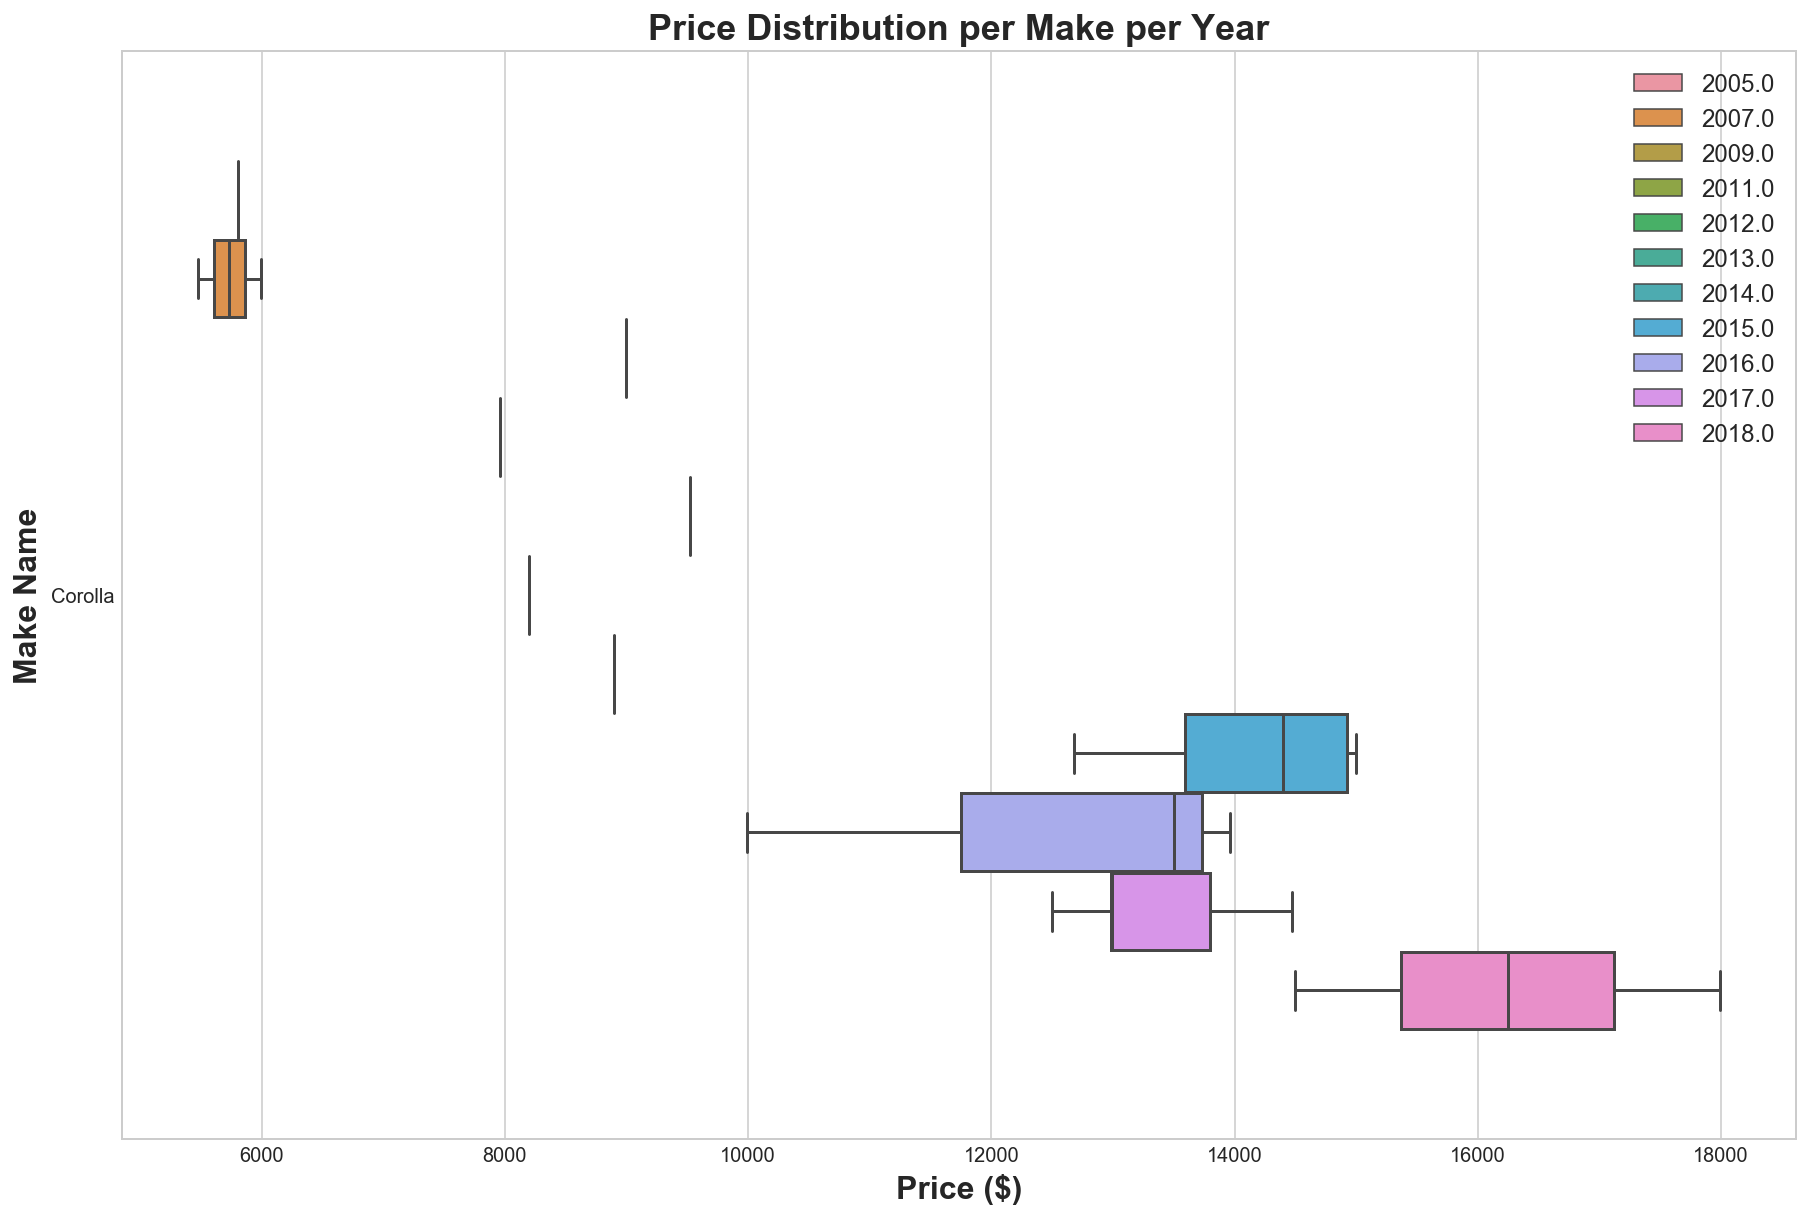

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
sns.boxplot(x='price',y='Model',data=temp,
            hue=(temp.ModelYear), notch=False ,orient='h')
plt.xlabel('Price ($)',fontsize=16,fontweight="bold")
plt.ylabel('Make Name',fontsize=16,fontweight="bold")
plt.title('Price Distribution per Make per Year',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=12)
plt.show()